# 文件分词与合并

In [2]:
import jieba
import time
import os

In [2]:
# 将输入文件jieba分词，写入输出文件
def write_token_to_file(input_file, output_file):
    file = open(input_file,encoding='utf8')
    for line in file:
        w = list(jieba.cut(line))
#         使用writelines一次写入，由于一次性加载文件过大导致内存耗尽，改用write多次写入
        output_file.write(' '.join(w)+'\n')

# 输入文件名
files = ['extracted\\AA\\zh_wiki_00_std','extracted\\AA\\zh_wiki_01_std','extracted\\AA\\zh_wiki_02_std']

# 依次读取输入文件，执行write_token_to_file
start = time.time()
with open('extracted\\AA\\train_corpus.txt','w',encoding='utf8') as output_f:
    for f in files:
        write_token_to_file(f, output_f)
        end = time.time()
        print('has been happend {} s'.format(end-start))
    output_f.close()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\14507\AppData\Local\Temp\jieba.cache
Loading model cost 0.957 seconds.
Prefix dict has been built succesfully.


has been happend 1006.6112942695618 s
has been happend 1993.8646714687347 s
has been happend 2400.7563071250916 s


# 训练word2vec模型

In [3]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
start = time.time()
word2vec_model = Word2Vec(LineSentence('extracted\\AA\\train_corpus.txt'), min_count=1, size=50)
end = time.time()
print(end-start)

1929.1403443813324


In [6]:
word2vec_model.wv['数学']

array([-2.282321  , -0.44795045, -4.8568454 , -0.19828543, -2.3957186 ,
       -0.8543265 , -4.0937886 , -1.620994  , -4.2064886 ,  3.0199509 ,
       -4.0798416 , -2.961179  , -3.072685  , -3.0365393 , -2.2685783 ,
       -0.5552411 , -3.6342132 ,  4.4730725 , -2.1415303 ,  1.0654018 ,
       -1.1314955 ,  1.9913912 ,  7.7213607 , -2.6069944 ,  0.85458905,
       -4.0367103 ,  3.824507  , -0.7418115 , -1.3029267 , -4.654424  ,
        0.9429767 , -3.0321064 ,  2.62501   , -2.763324  ,  0.10017005,
        0.50067776,  1.1335301 , -0.37214896,  2.3736773 ,  6.1311626 ,
       -2.8427043 , -0.73304135, -4.08575   , -1.9479111 , -3.0024953 ,
       -0.71466815,  1.3172454 ,  5.567283  , -2.997903  , -3.7266822 ],
      dtype=float32)

In [9]:
word2vec_model.most_similar('数学')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('微积分', 0.9139703512191772),
 ('数学分析', 0.8944025039672852),
 ('逻辑学', 0.8847537636756897),
 ('数论', 0.8788271546363831),
 ('概率论', 0.8649075031280518),
 ('计算机科学', 0.8642547130584717),
 ('理论物理学', 0.8612189292907715),
 ('高等数学', 0.8522629141807556),
 ('数理逻辑', 0.8518953323364258),
 ('拓扑学', 0.851504385471344)]

# 模型导入与导出

In [8]:
word2vec_model.save('word2vec_model')

In [4]:
word2vec_model = Word2Vec.load('word2vec_model')

# T-SNE

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def tsne_plot(model):
    labels = []
    tokens = []

    label_num_limit = 0
    for word in model.wv.vocab:
        if label_num_limit > 200:
            break
        labels.append(word)
        tokens.append(model[word])
        label_num_limit += 1

    tsne_model = TSNE(n_components=2, init='pca', n_iter=2000, random_state=1)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(
            labels[i],
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


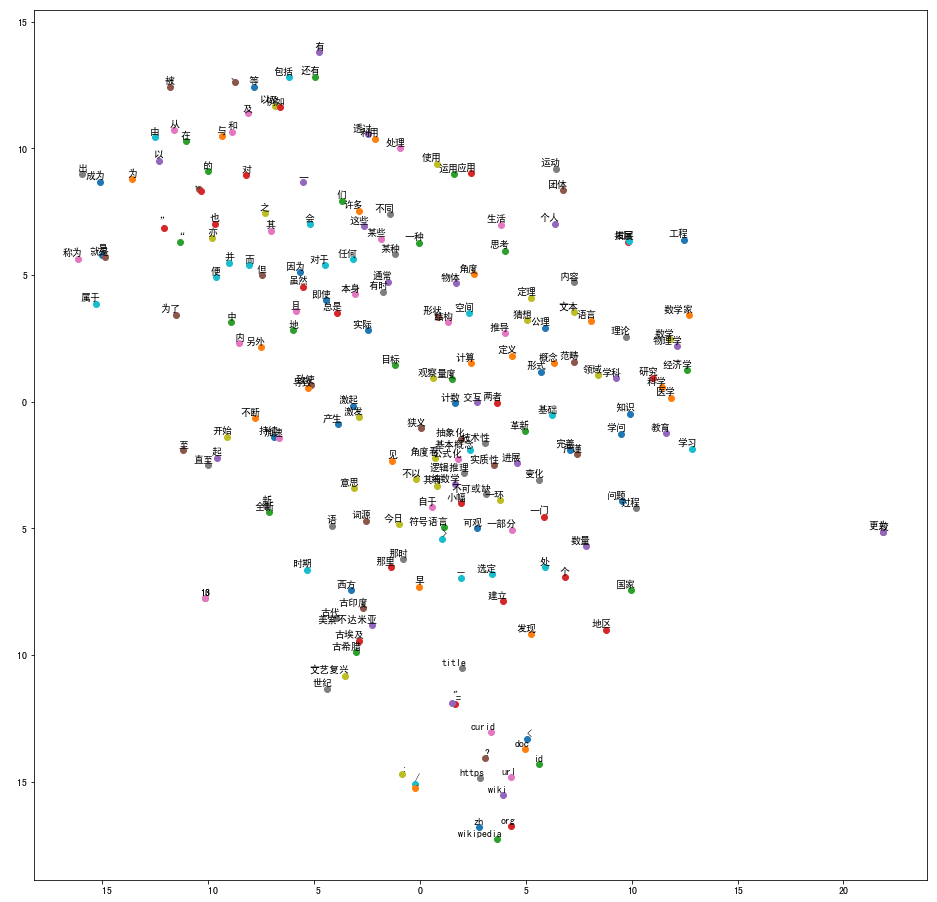

In [11]:
tsne_plot(word2vec_model)